# Module 5: Section 2 - Core Analysis Techniques
## Interactive Jupyter Notebook for EDA Training

This notebook accompanies slides 8-16 of the presentation. Each section includes:
- **Slide Content**: Toggle to show/hide the slide material
- **Live Demo**: Interactive code demonstrations
- **Practice**: Exercises to reinforce concepts

---

In [1]:
# Initial Setup - Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Setup complete! Libraries loaded and ready.")

✅ Setup complete! Libraries loaded and ready.


## 1. Univariate Analysis: Numeric Variables
### 📖 Slide 9 - Analyzing Single Numeric Variables

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Univariate Analysis: Numeric Variables**

Key Visualization Methods:
1. **Histogram**: Displays frequency distribution, revealing shape and spread
2. **Density Plot**: A smooth alternative to histograms showing distribution shape
3. **Box Plot**: Summarizes five-number statistics and highlights outliers
4. **Q-Q Plot**: Assesses normality by comparing data quantiles to theoretical normal distribution

</details>

In [2]:
# Generate sample data with different distributions
np.random.seed(42)

# Create different distributions
normal_data = np.random.normal(100, 15, 1000)
skewed_data = np.random.exponential(scale=20, size=1000)
uniform_data = np.random.uniform(50, 150, 1000)
bimodal_data = np.concatenate([np.random.normal(70, 10, 500), 
                                np.random.normal(130, 10, 500)])

# Create dataframe
df_numeric = pd.DataFrame({
    'Normal': normal_data,
    'Skewed': skewed_data,
    'Uniform': uniform_data,
    'Bimodal': bimodal_data
})

print("Sample Data Generated:")
print(df_numeric.describe())

Sample Data Generated:
            Normal       Skewed      Uniform      Bimodal
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    100.289981    20.159719    99.449499   100.072890
std      14.688239    20.059770    28.891967    31.887718
min      51.380990     0.064469    50.001163    40.088640
25%      90.286145     5.679090    75.652351    69.688460
50%     100.379509    14.518624    99.171060   100.817815
75%     109.719158    27.433685   123.862888   130.422999
max     157.790972   148.834458   149.782086   158.684031


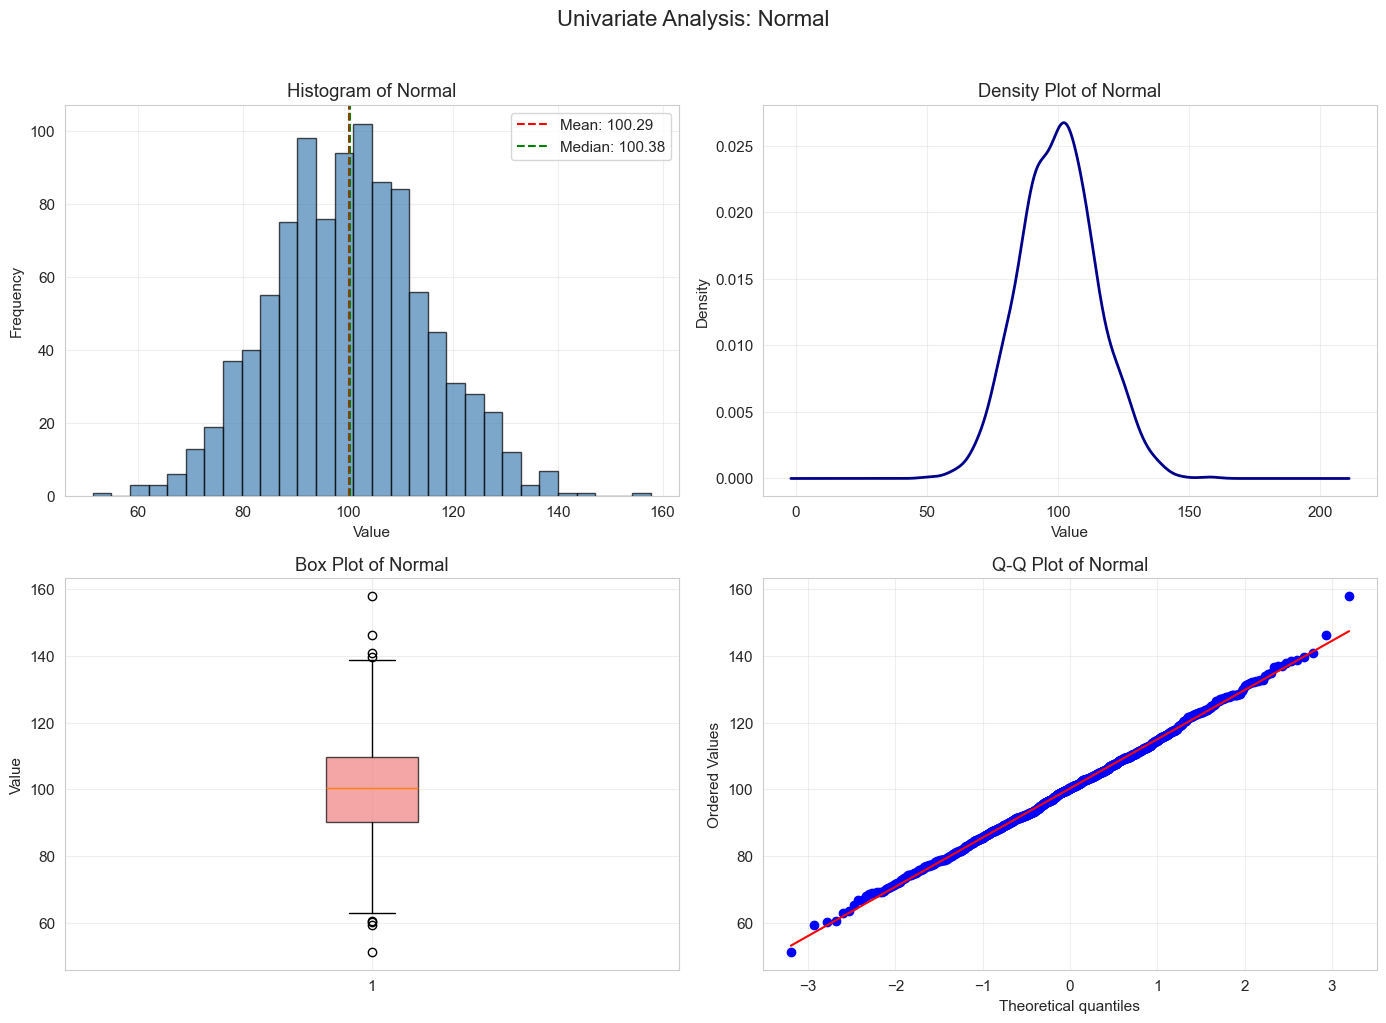


📊 Statistical Summary for Normal:
Mean: 100.29
Median: 100.38
Std Dev: 14.69
Skewness: 0.12
Kurtosis: 0.07


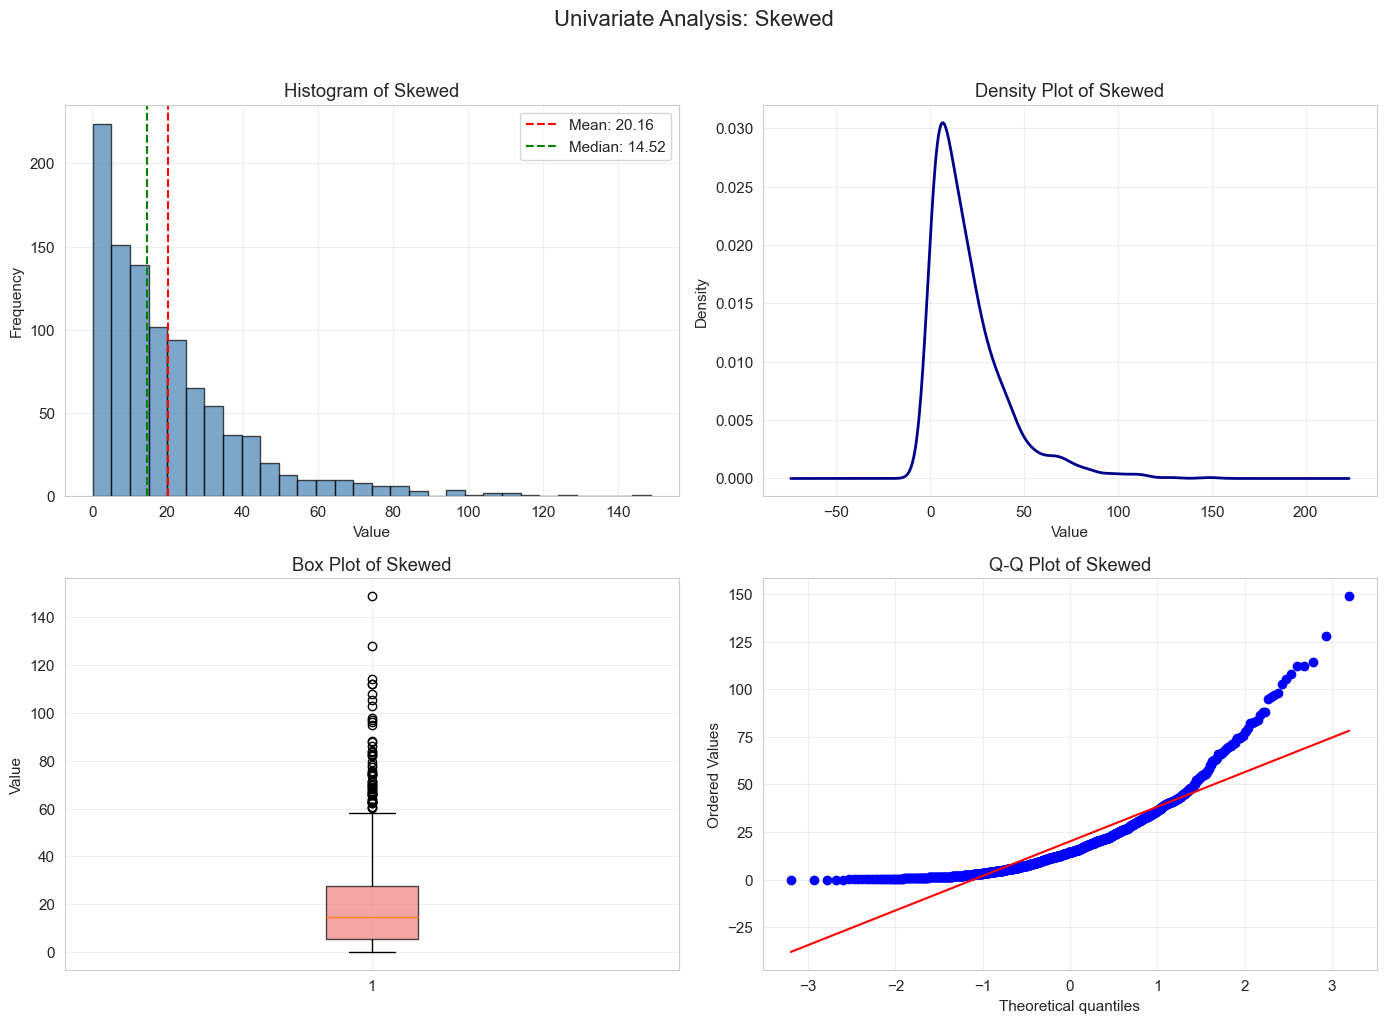


📊 Statistical Summary for Skewed:
Mean: 20.16
Median: 14.52
Std Dev: 20.06
Skewness: 1.98
Kurtosis: 5.41


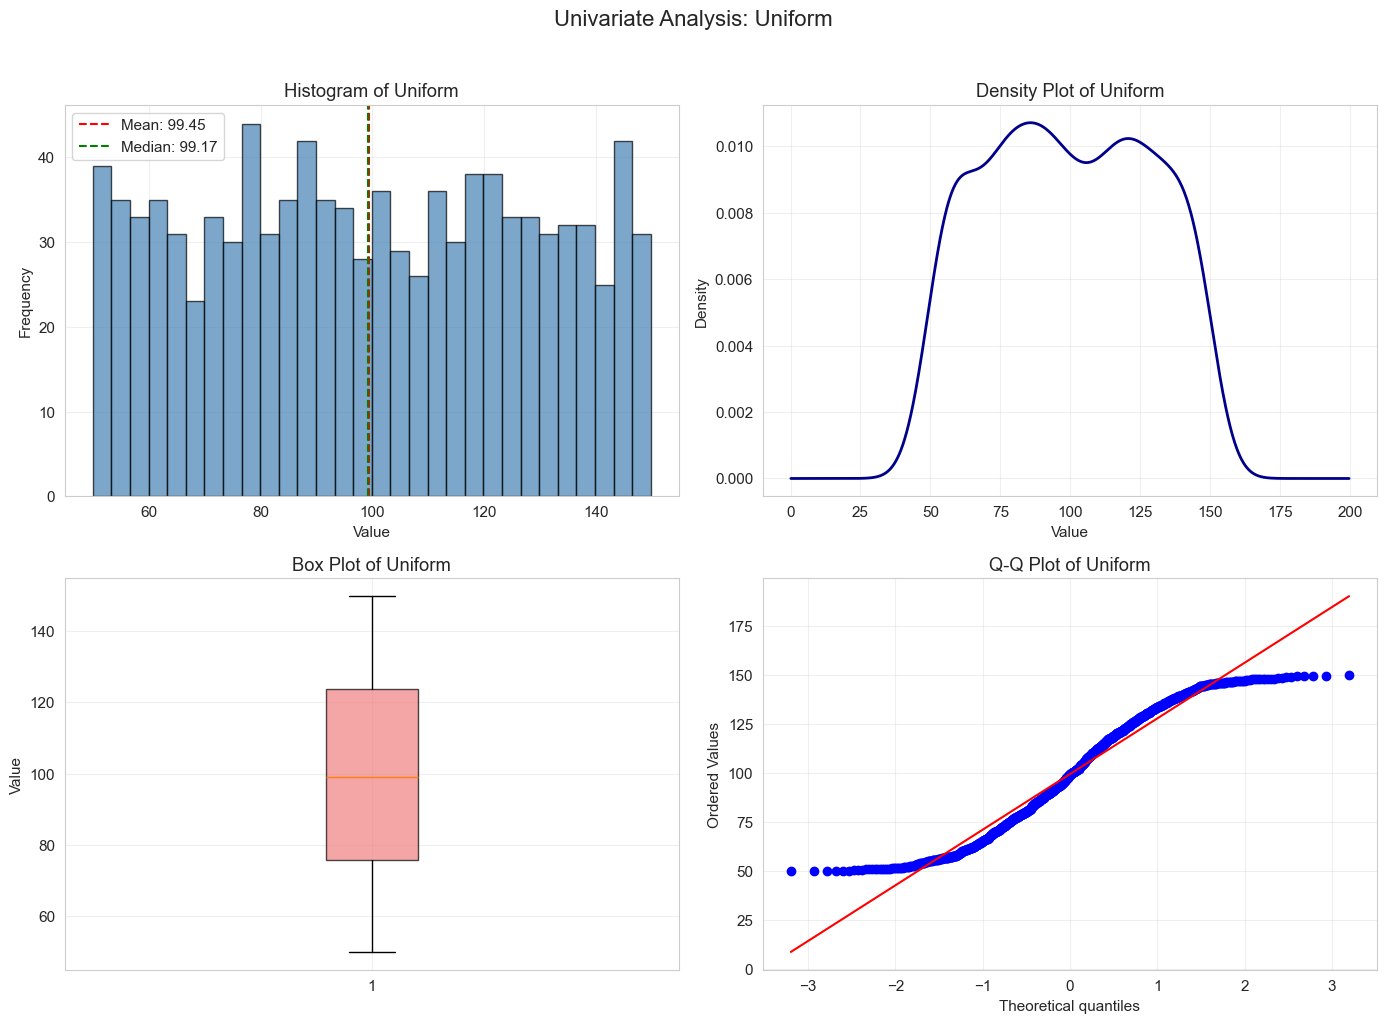


📊 Statistical Summary for Uniform:
Mean: 99.45
Median: 99.17
Std Dev: 28.89
Skewness: 0.01
Kurtosis: -1.18


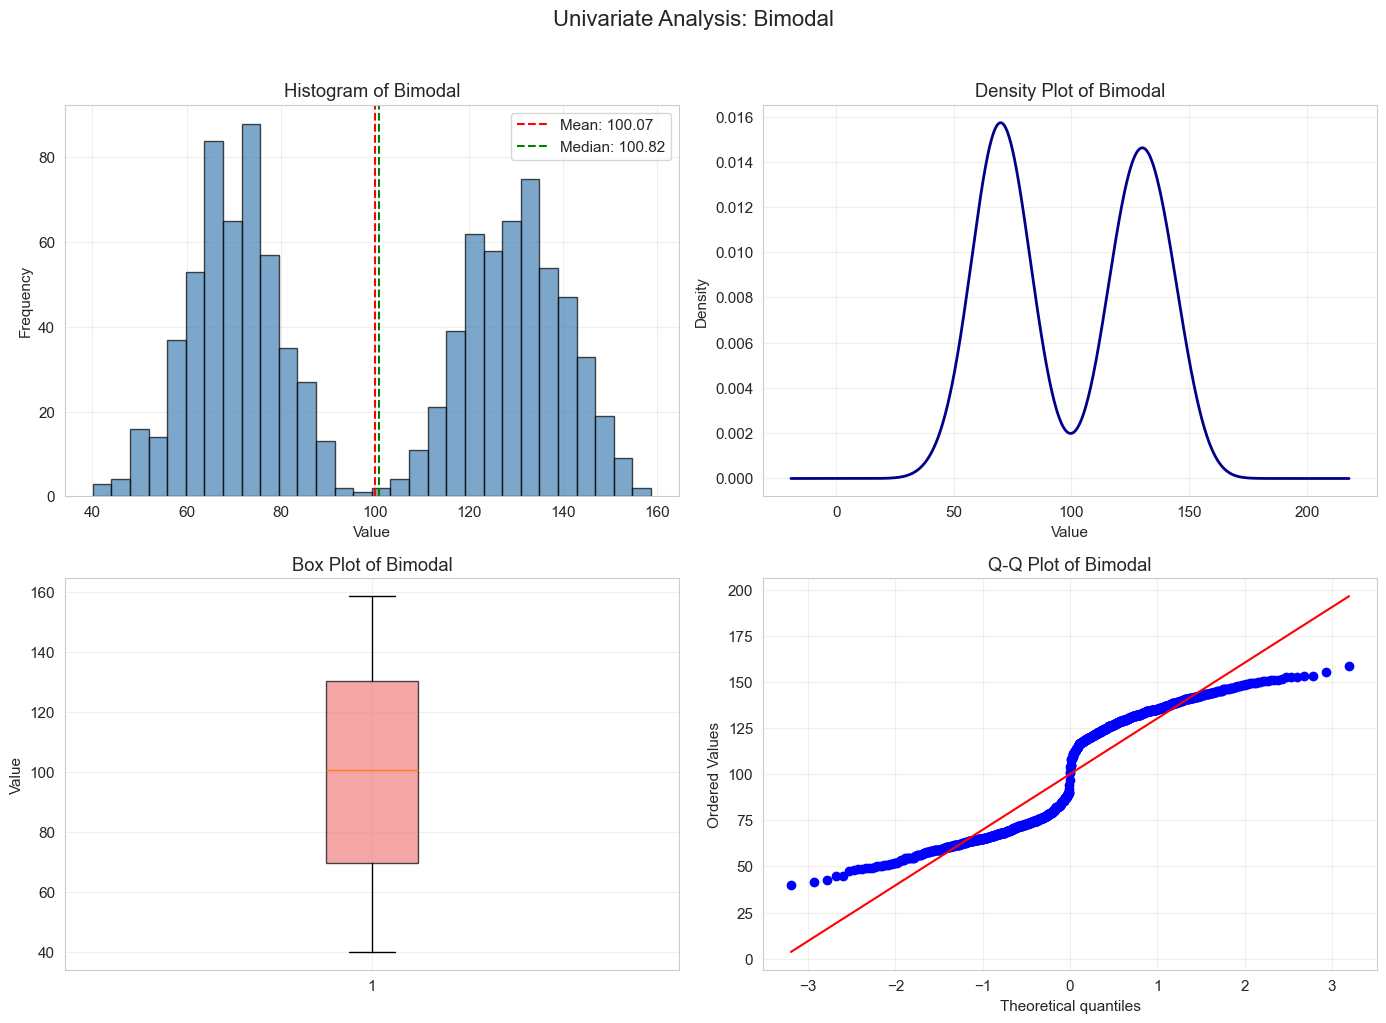


📊 Statistical Summary for Bimodal:
Mean: 100.07
Median: 100.82
Std Dev: 31.89
Skewness: 0.02
Kurtosis: -1.61


In [3]:
# Univariate Analysis Visualization
def analyze_univariate(data, title='Distribution'):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.2f}')
    axes[0, 0].set_title(f'Histogram of {title}')
    axes[0, 0].set_xlabel('Value')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Density Plot
    data.plot.kde(ax=axes[0, 1], color='darkblue', linewidth=2)
    axes[0, 1].set_title(f'Density Plot of {title}')
    axes[0, 1].set_xlabel('Value')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Box Plot
    bp = axes[1, 0].boxplot(data, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][0].set_alpha(0.7)
    axes[1, 0].set_title(f'Box Plot of {title}')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q Plot of {title}')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'Univariate Analysis: {title}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print(f"\n📊 Statistical Summary for {title}:")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Std Dev: {data.std():.2f}")
    print(f"Skewness: {data.skew():.2f}")
    print(f"Kurtosis: {data.kurtosis():.2f}")

# Analyze each distribution
for col in df_numeric.columns:
    analyze_univariate(df_numeric[col], col)

## 2. Univariate Analysis: Categorical Variables
### 📖 Slide 10 - Analyzing Single Categorical Variables

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Univariate Analysis: Categorical Variables**

Key Visualization Methods:
1. **Bar Plot**: Standard tool for frequency counts
2. **Pie Chart**: Shows parts of a whole (use sparingly)
3. **Pareto Chart**: Combines bar plot with cumulative percentage
4. **Horizontal Bar Plot**: Effective for long labels

</details>

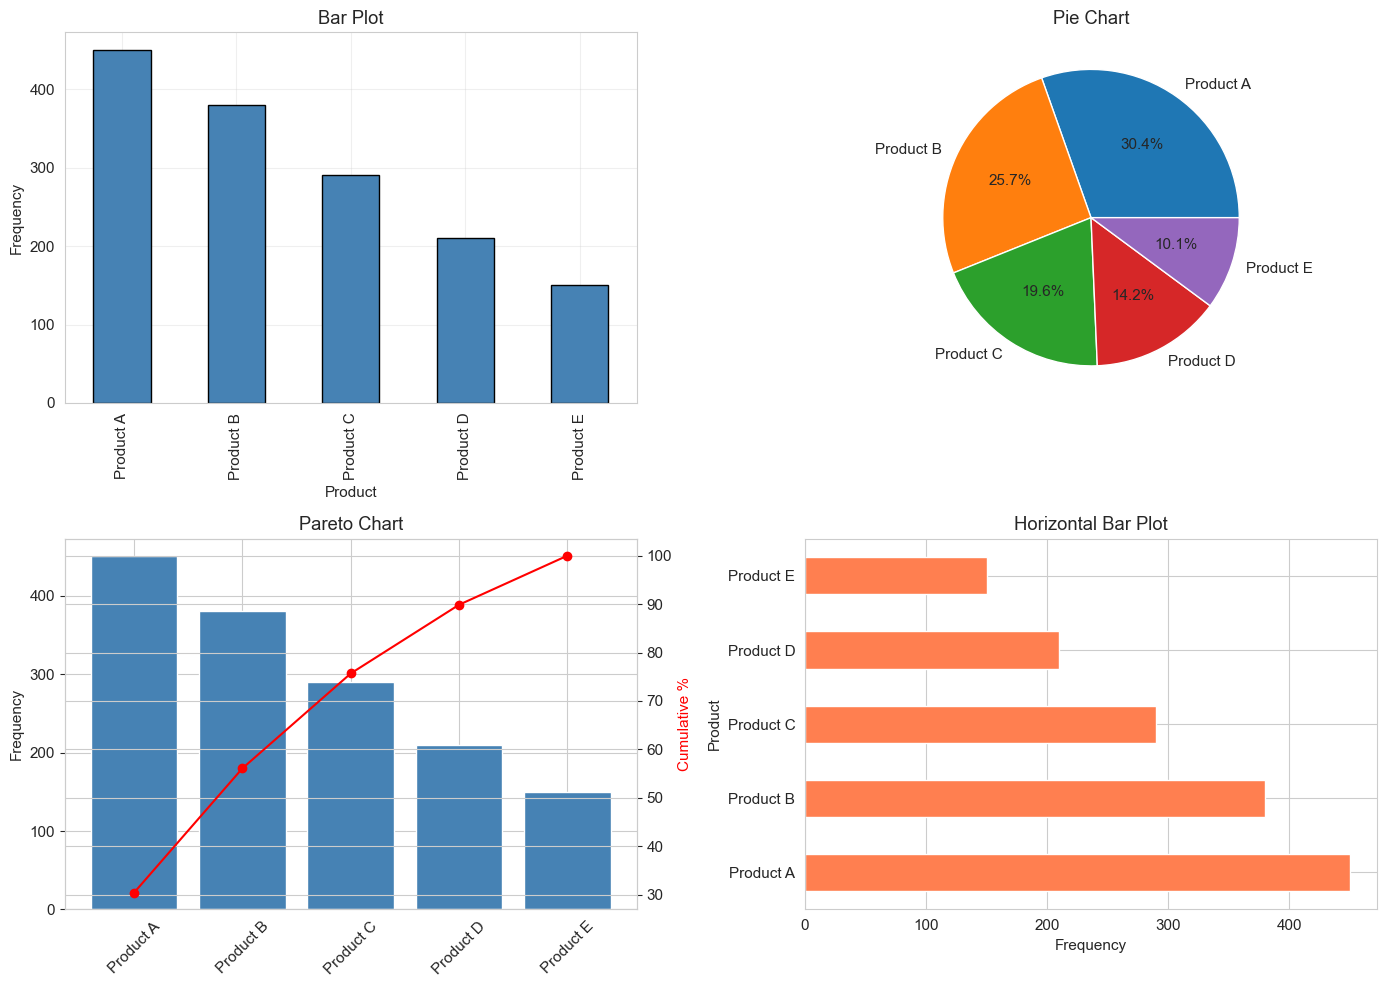

In [4]:
# Generate categorical data
np.random.seed(42)

categories = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
frequencies = [450, 380, 290, 210, 150]

df_categorical = pd.DataFrame({
    'Product': np.repeat(categories, frequencies)
})

# Categorical visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

value_counts = df_categorical['Product'].value_counts()

# Bar Plot
value_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Bar Plot')
axes[0, 0].set_xlabel('Product')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Pie Chart
axes[0, 1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Pie Chart')

# Pareto Chart
sorted_counts = value_counts.sort_values(ascending=False)
cumulative_percent = sorted_counts.cumsum() / sorted_counts.sum() * 100

axes[1, 0].bar(range(len(sorted_counts)), sorted_counts.values, color='steelblue')
ax2 = axes[1, 0].twinx()
ax2.plot(range(len(sorted_counts)), cumulative_percent.values, color='red', marker='o')
axes[1, 0].set_xticks(range(len(sorted_counts)))
axes[1, 0].set_xticklabels(sorted_counts.index, rotation=45)
axes[1, 0].set_ylabel('Frequency')
ax2.set_ylabel('Cumulative %', color='red')
axes[1, 0].set_title('Pareto Chart')

# Horizontal Bar Plot
value_counts.plot(kind='barh', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Horizontal Bar Plot')
axes[1, 1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Distribution Analysis: Skewness and Kurtosis
### 📖 Slide 11 - Understanding Distribution Shapes

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Understanding Distribution Shapes**

Key Concepts:
- **Skewness**: Measures asymmetry (0=symmetric, positive=right skew, negative=left skew)
- **Kurtosis**: Measures tail heaviness (3=normal, >3=heavy tails, <3=light tails)
- **Normality Testing**: Shapiro-Wilk, D'Agostino-Pearson, Anderson-Darling

</details>

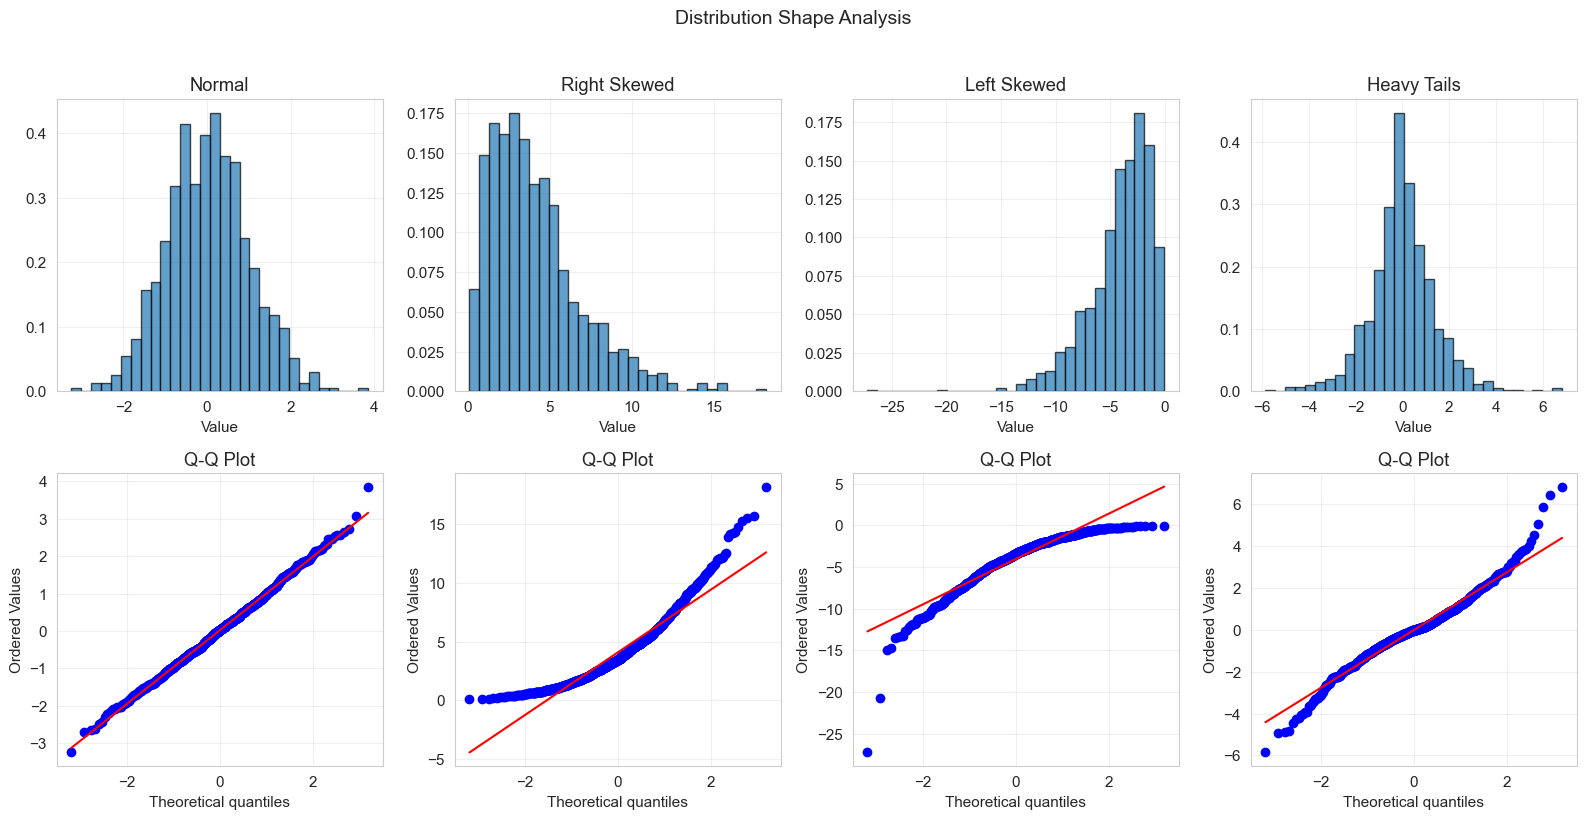


📊 Distribution Characteristics and Normality Tests:

Normal:
  Skewness: 0.117
  Kurtosis: 0.066
  Shapiro-Wilk p-value: 0.4013
  Normal? Yes (α=0.05)

Right Skewed:
  Skewness: 1.231
  Kurtosis: 1.877
  Shapiro-Wilk p-value: 0.0000
  Normal? No (α=0.05)

Left Skewed:
  Skewness: -1.574
  Kurtosis: 5.533
  Shapiro-Wilk p-value: 0.0000
  Normal? No (α=0.05)

Heavy Tails:
  Skewness: 0.142
  Kurtosis: 2.256
  Shapiro-Wilk p-value: 0.0000
  Normal? No (α=0.05)


In [5]:
# Generate distributions with different shapes
np.random.seed(42)

# Normal distribution
normal = np.random.normal(0, 1, 1000)

# Right-skewed (positive skew)
right_skewed = np.random.gamma(2, 2, 1000)

# Left-skewed (negative skew)
left_skewed = -np.random.gamma(2, 2, 1000)

# High kurtosis (heavy tails)
heavy_tails = np.random.laplace(0, 1, 1000)

distributions = {
    'Normal': normal,
    'Right Skewed': right_skewed,
    'Left Skewed': left_skewed,
    'Heavy Tails': heavy_tails
}

# Analyze each distribution
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, (name, data) in enumerate(distributions.items()):
    # Histogram
    axes[0, idx].hist(data, bins=30, density=True, alpha=0.7, edgecolor='black')
    axes[0, idx].set_title(f'{name}')
    axes[0, idx].set_xlabel('Value')
    axes[0, idx].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[1, idx])
    axes[1, idx].set_title(f'Q-Q Plot')
    axes[1, idx].grid(True, alpha=0.3)

plt.suptitle('Distribution Shape Analysis', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Statistical tests
print("\n📊 Distribution Characteristics and Normality Tests:")
print("="*60)

for name, data in distributions.items():
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    shapiro_stat, shapiro_p = stats.shapiro(data[:500])
    
    print(f"\n{name}:")
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurt:.3f}")
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.4f}")
    print(f"  Normal? {'Yes' if shapiro_p > 0.05 else 'No'} (α=0.05)")

## 4. Bivariate Analysis: Numeric vs Numeric
### 📖 Slide 12 - Relationships Between Numeric Variables

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Bivariate Analysis: Numeric vs Numeric**

Key Methods:
- **Scatter Plot**: Foundation for visualizing correlations
- **Regression Line**: Shows trend and predictive relationship
- **Correlation Coefficient**: Quantifies linear association strength
- **Hexbin Plot**: Density representation for large datasets

</details>

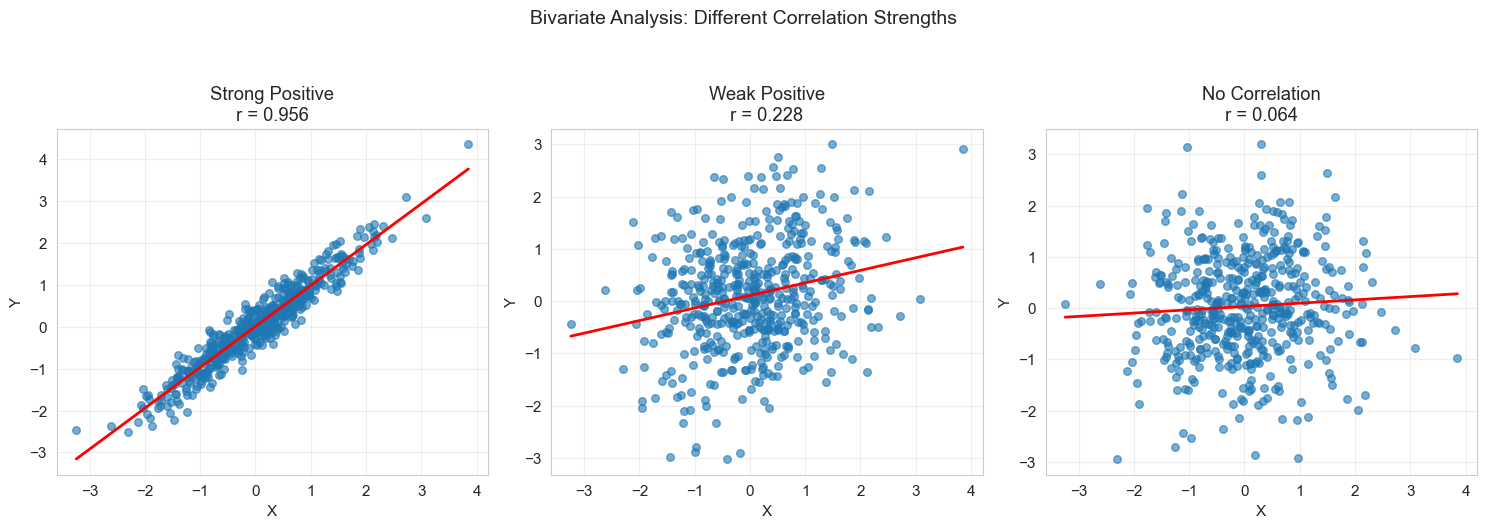

In [6]:
# Generate correlated data
np.random.seed(42)
n_points = 500

x = np.random.randn(n_points)
y_strong = x + np.random.randn(n_points) * 0.3
y_weak = x * 0.3 + np.random.randn(n_points)
y_none = np.random.randn(n_points)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

correlations = [
    (x, y_strong, 'Strong Positive'),
    (x, y_weak, 'Weak Positive'),
    (x, y_none, 'No Correlation')
]

for idx, (x_data, y_data, title) in enumerate(correlations):
    axes[idx].scatter(x_data, y_data, alpha=0.6, s=30)
    
    # Add regression line
    z = np.polyfit(x_data, y_data, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x_data.min(), x_data.max(), 100)
    axes[idx].plot(x_line, p(x_line), 'r-', linewidth=2)
    
    # Calculate correlation
    r, p_val = stats.pearsonr(x_data, y_data)
    
    axes[idx].set_title(f'{title}\nr = {r:.3f}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('Y')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Bivariate Analysis: Different Correlation Strengths', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

## 5. Correlation Matrix Analysis
### 📖 Slide 14 - Finding Linear Relationships

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Correlation Analysis**

Key Concepts:
- **Correlation Matrix**: Summarizes pairwise correlations
- **Heatmap Visualization**: Color-coded matrix for patterns
- **Threshold Filtering**: Focus on |r| > 0.7
- **Feature Selection**: Guide model building

</details>

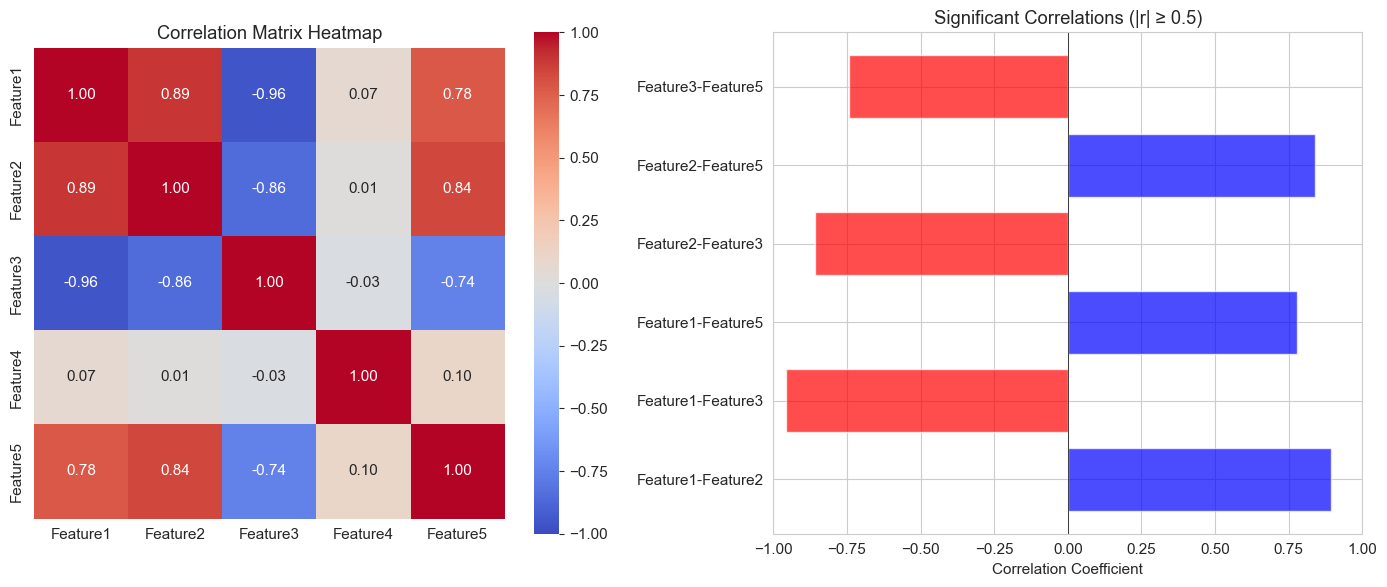

In [7]:
# Create correlated dataset
np.random.seed(42)
n = 200

# Generate correlated features
feature_data = pd.DataFrame({
    'Feature1': np.random.randn(n),
})

feature_data['Feature2'] = feature_data['Feature1'] + np.random.randn(n) * 0.5
feature_data['Feature3'] = -feature_data['Feature1'] + np.random.randn(n) * 0.3
feature_data['Feature4'] = np.random.randn(n)
feature_data['Feature5'] = feature_data['Feature2'] + np.random.randn(n) * 0.7

# Calculate correlation matrix
corr_matrix = feature_data.corr()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap')

# Significant correlations bar plot
threshold = 0.5
significant = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            significant.append((
                f"{corr_matrix.columns[i]}-{corr_matrix.columns[j]}",
                corr_matrix.iloc[i, j]
            ))

if significant:
    pairs, values = zip(*significant)
    y_pos = np.arange(len(pairs))
    colors = ['red' if v < 0 else 'blue' for v in values]
    
    axes[1].barh(y_pos, values, color=colors, alpha=0.7)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels(pairs)
    axes[1].set_xlabel('Correlation Coefficient')
    axes[1].set_title(f'Significant Correlations (|r| ≥ {threshold})')
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

## Practice Exercise

### 🎯 Complete EDA Workflow
Now it's your turn to practice! Use the space below to:
1. Load or generate your own dataset
2. Perform univariate analysis
3. Explore bivariate relationships
4. Create a correlation matrix
5. Test for normality and apply appropriate statistical tests

In [8]:
# Your practice code here
# Example starter:

# Step 1: Generate or load data
# my_data = pd.read_csv('your_data.csv')  # or generate synthetic data

# Step 2: Explore the data
# print(my_data.head())
# print(my_data.info())
# print(my_data.describe())

# Step 3: Perform your analysis
# ...


## Summary

### 📚 Key Takeaways from Section 2:

1. **Univariate Analysis** helps understand individual variables through:
   - Histograms, density plots, box plots, Q-Q plots for numeric data
   - Bar plots, pie charts, Pareto charts for categorical data

2. **Distribution Analysis** reveals:
   - Skewness (asymmetry)
   - Kurtosis (tail heaviness)
   - Normality through statistical tests

3. **Bivariate Analysis** uncovers relationships:
   - Scatter plots and correlation for numeric pairs
   - Box plots and ANOVA for categorical vs numeric

4. **Correlation Analysis** guides feature selection:
   - Heatmaps reveal patterns
   - Threshold filtering focuses on strong relationships

### 💡 Remember:
- Always check assumptions before applying tests
- Visualization and statistics complement each other
- Effect size matters as much as statistical significance
- Document your findings clearly

---
**End of Section 2: Core Analysis Techniques**